In [320]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np

In [321]:
#request a list of all Canadian postal codes starting with M in Canada from wikipedia
req = requests.get("https://en.wikipedia.org/w/index.php?title=List_of_postal_codes_of_Canada:_M&oldid=945633050.")

soup = BeautifulSoup(req.content,'lxml')

table = soup.find_all('table')[0]

df = pd.read_html(str(table))

neighborhood=pd.DataFrame(df[0])

In [322]:
neighborhood.head(11)

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor
7,M7A,Downtown Toronto,Queen's Park
8,M8A,Not assigned,Not assigned
9,M9A,Etobicoke,Islington Avenue


In [323]:
#Clean
neighborhood['Borough']=neighborhood['Borough'].replace('Not assigned', np.nan)
neighborhood['Neighbourhood']=neighborhood['Neighbourhood'].replace('Not assigned', neighborhood['Borough'])
df=neighborhood.dropna()

In [324]:
#Get rid of duplicate Postal Codes
nei=df.groupby(('Postcode','Borough'))
grp=nei['Neighbourhood'].unique()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  from ipykernel import kernelapp as app


In [325]:
#reset index
pst=grp.reset_index()
pst.head()

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"[Rouge, Malvern]"
1,M1C,Scarborough,"[Highland Creek, Rouge Hill, Port Union]"
2,M1E,Scarborough,"[Guildwood, Morningside, West Hill]"
3,M1G,Scarborough,[Woburn]
4,M1H,Scarborough,[Cedarbrae]


In [326]:
#Data containing latitude and longitude for each postal code
!wget http://cocl.us/Geospatial_data

--2020-03-22 00:49:14--  http://cocl.us/Geospatial_data
Resolving cocl.us (cocl.us)... 158.85.108.83, 169.48.113.194, 158.85.108.86
Connecting to cocl.us (cocl.us)|158.85.108.83|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cocl.us/Geospatial_data [following]
--2020-03-22 00:49:14--  https://cocl.us/Geospatial_data
Connecting to cocl.us (cocl.us)|158.85.108.83|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://ibm.box.com/shared/static/9afzr83pps4pwf2smjjcf1y5mvgb18rr.csv [following]
--2020-03-22 00:49:15--  https://ibm.box.com/shared/static/9afzr83pps4pwf2smjjcf1y5mvgb18rr.csv
Resolving ibm.box.com (ibm.box.com)... 107.152.26.197, 107.152.27.197
Connecting to ibm.box.com (ibm.box.com)|107.152.26.197|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/9afzr83pps4pwf2smjjcf1y5mvgb18rr.csv [following]
--2020-03-22 00:49:15--  https://ib

In [327]:
df=pd.read_csv('Geospatial_data')

In [328]:
df=df.rename(columns={'Postal Code':'Postcode'})
df.head()

,Postcode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [329]:
#merging dataframes with latitude and longitude with my Neighbourhood and Borough dataframe
mrg=pst.merge(df,on='Postcode', how='left')
mrg.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"[Rouge, Malvern]",43.806686,-79.194353
1,M1C,Scarborough,"[Highland Creek, Rouge Hill, Port Union]",43.784535,-79.160497
2,M1E,Scarborough,"[Guildwood, Morningside, West Hill]",43.763573,-79.188711
3,M1G,Scarborough,[Woburn],43.770992,-79.216917
4,M1H,Scarborough,[Cedarbrae],43.773136,-79.239476


In [330]:
#get population and income data from stats canada
!wget https://www.canada.ca/content/dam/cra-arc/prog-policy/stats/individual-tax-stats-fsa/2015-tax-year/tbl1a-en.csv

--2020-03-22 00:49:19--  https://www.canada.ca/content/dam/cra-arc/prog-policy/stats/individual-tax-stats-fsa/2015-tax-year/tbl1a-en.csv
Resolving www.canada.ca (www.canada.ca)... 104.100.228.47, 2600:1404:23:197::fe9, 2600:1404:23:183::fe9
Connecting to www.canada.ca (www.canada.ca)|104.100.228.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘tbl1a-en.csv.2’

    [ <=>                                   ] 120,145     --.-K/s   in 0.005s  

2020-03-22 00:49:19 (23.9 MB/s) - ‘tbl1a-en.csv.2’ saved [120145]



In [331]:
df=pd.read_csv('tbl1a-en.csv')

In [332]:
df.head()

,Prov/Terr,FSA,Total,Total Income,Net Income,Taxable Income,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,10,A0A,40150.0,1.673931e+09,1.567848e+09,1.493232e+09,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10,A0B,17820.0,7.141520e+08,6.711270e+08,6.387630e+08,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10,A0C,11180.0,3.787120e+08,3.585890e+08,3.375470e+08,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10,A0E,19860.0,8.285010e+08,7.723290e+08,7.383670e+08,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10,A0G,31290.0,1.089500e+09,1.023297e+09,9.636890e+08,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [333]:
#Clean - rename column and remove unwanted columns
df=df.rename(columns={'FSA':'Postcode', 'Total':'Population, 2015','Total Income':'Total Income, 2015'})
df.drop(columns=['Prov/Terr', 'Net Income', 'Taxable Income'], inplace=True)
df = df[df.columns.drop(list(df.filter(regex='Unnamed:')))]
df.head()

,Postcode,"Population, 2015","Total Income, 2015"
0,A0A,40150.0,1.673931e+09
1,A0B,17820.0,7.141520e+08
2,A0C,11180.0,3.787120e+08
3,A0E,19860.0,8.285010e+08
4,A0G,31290.0,1.089500e+09


In [334]:
#Clean - converting columns to int
df = df.fillna(0)
df['Total Income, 2015']=df['Total Income, 2015'].astype(int)
df['Population, 2015']=df['Population, 2015'].astype(int)
df['Postcode']=df['Postcode'].astype(str)
df.head()

,Postcode,"Population, 2015","Total Income, 2015"
0,A0A,40150,1673931000
1,A0B,17820,714152000
2,A0C,11180,378712000
3,A0E,19860,828501000
4,A0G,31290,1089500000


In [335]:
# only want to see postal codes that start with M
df1 = df[df.Postcode.str[0] == 'M']


In [336]:
#Creating income per capit  -total income divided by population
df1.reset_index(drop=True,inplace=True)
df1['Income Per Capita, 2015']=df1['Total Income, 2015'].divide(df1['Population, 2015'])
df1.dropna(inplace=True)
df1['Income Per Capita, 2015']=df1['Income Per Capita, 2015'].astype(int)
df1.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing

,Postcode,"Population, 2015","Total Income, 2015","Income Per Capita, 2015"
0,M1B,51410,1577233000,30679
1,M1C,29080,1483624000,51018
2,M1E,36220,1320927000,36469
3,M1G,22820,637206000,27923
4,M1H,19440,615223000,31647


In [337]:
# merging my population and income dataframe with the location dataframe
mrg1=mrg.merge(df1,on='Postcode', how='left')
mrg1.head(103)

,Postcode,Borough,Neighbourhood,Latitude,Longitude,"Population, 2015","Total Income, 2015","Income Per Capita, 2015"
0,M1B,Scarborough,"[Rouge, Malvern]",43.806686,-79.194353,51410.0,1.577233e+09,30679.0
1,M1C,Scarborough,"[Highland Creek, Rouge Hill, Port Union]",43.784535,-79.160497,29080.0,1.483624e+09,51018.0
2,M1E,Scarborough,"[Guildwood, Morningside, West Hill]",43.763573,-79.188711,36220.0,1.320927e+09,36469.0
3,M1G,Scarborough,[Woburn],43.770992,-79.216917,22820.0,6.372060e+08,27923.0
4,M1H,Scarborough,[Cedarbrae],43.773136,-79.239476,19440.0,6.152230e+08,31647.0
5,M1J,Scarborough,[Scarborough Village],43.744734,-79.239476,27040.0,7.925150e+08,29308.0
6,M1K,Scarborough,"[East Birchmount Park, Ionview, Kennedy Park]",43.727929,-79.262029,37790.0,1.127593e+09,29838.0
7,M1L,Scarborough,"[Clairlea, Golden Mile, Oakridge]",43.711112,-79.284577,25990.0,8.405880e+08,32342.0
8,M1M,Scarborough,"[Cliffcrest, Cliffside, Scarborough Village West]",43.716316,-79.239476,18020.0,8.157770e+08,45270.0
9,M1N,Scarborough,"[Birch Cliff, Cliffside West]",43.692657,-79.264848,16990.0,9.431340e+08,55511.0


In [338]:
#Clean - converting columns to int
mrg1.dropna(inplace=True)
mrg1['Population, 2015']=mrg1['Population, 2015'].astype(int)
mrg1['Total Income, 2015']=mrg1['Total Income, 2015'].astype(int)
mrg1['Income Per Capita, 2015']=mrg1['Income Per Capita, 2015'].astype(int)
mrg1.reset_index(drop=True,inplace=True)
mrg1.tail()

,Postcode,Borough,Neighbourhood,Latitude,Longitude,"Population, 2015","Total Income, 2015","Income Per Capita, 2015"
95,M9N,York,[Weston],43.706876,-79.518188,19260,643713000,33422
96,M9P,Etobicoke,[Westmount],43.696319,-79.532242,16510,829459000,50239
97,M9R,Etobicoke,"[Kingsview Village, Martin Grove Gardens, Rich...",43.688905,-79.554724,26510,1002759000,37825
98,M9V,Etobicoke,"[Albion Gardens, Beaumond Heights, Humbergate,...",43.739416,-79.588437,43220,1163260000,26914
99,M9W,Etobicoke,[Northwest],43.706748,-79.594054,32670,1071930000,32810


In [340]:

from pandas.io.json import json_normalize
print("Done!")

Done!


In [341]:
# The code was removed by Watson Studio for sharing.

In [342]:
closestsub = pd.DataFrame(columns=['Station Name', 'Station Latitude', 'Station Longitude','Distance'])

In [343]:
# for each postal code we find the closest subway station
for i in range(0,100):
    latitude=mrg1.iloc[i,3]
    longitude=mrg1.iloc[i,4]
    search_query = 'Subway Station'
    radius = 10000
    url = 'https://api.foursquare.com/v2/venues/search?categoryId=4bf58dd8d48988d1fd931735&client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
    results = requests.get(url).json()
    # assign relevant part of JSON to venues
    venues = results['response']['venues']
    # tranform venues into a dataframe
    dataframe = json_normalize(venues)
    dataframe.sort_values(by=['location.distance'], inplace=True)
    dataframe.reset_index(drop=True, inplace=True)
    dataframe.drop(['categories', 'hasPerk', 'id', 'location.cc','location.country','location.formattedAddress', 'location.labeledLatLngs', 'referralId'], axis=1, inplace=True)
    dataframe=dataframe.rename(columns={'location.lat':'Station Latitude', 'location.lng':'Station Longitude','name':'Station Name', 'location.distance':'Distance'})
    closestsub=closestsub.append(dataframe.iloc[0],ignore_index=True)


In [344]:
closestsub.head()


,Station Name,Station Latitude,Station Longitude,Distance,location.address,location.city,location.crossStreet,location.postalCode,location.state,location.neighborhood
0,Kennedy Subway/RT Station,43.732582,-79.26343,9944,2455 Eglinton Av E,Toronto,at Kennedy Rd,NaN,ON,NaN
1,Kennedy Subway/RT Station,43.732582,-79.26343,10096,2455 Eglinton Av E,Toronto,at Kennedy Rd,NaN,ON,NaN
2,Kennedy Subway/RT Station,43.732582,-79.26343,6928,2455 Eglinton Av E,Toronto,at Kennedy Rd,NaN,ON,NaN
3,Kennedy Subway/RT Station,43.732582,-79.26343,5680,2455 Eglinton Av E,Toronto,at Kennedy Rd,NaN,ON,NaN
4,Kennedy Subway/RT Station,43.732582,-79.26343,4908,2455 Eglinton Av E,Toronto,at Kennedy Rd,NaN,ON,NaN


In [345]:
closestsub.drop(['location.address', 'location.city', 'location.crossStreet', 'location.state', 'location.neighborhood', "location.postalCode"], axis=1, inplace=True)

In [346]:
closestsub.head()

,Station Name,Station Latitude,Station Longitude,Distance
0,Kennedy Subway/RT Station,43.732582,-79.26343,9944
1,Kennedy Subway/RT Station,43.732582,-79.26343,10096
2,Kennedy Subway/RT Station,43.732582,-79.26343,6928
3,Kennedy Subway/RT Station,43.732582,-79.26343,5680
4,Kennedy Subway/RT Station,43.732582,-79.26343,4908


In [347]:
subdf = pd.concat([mrg1, closestsub], axis=1)

In [556]:
subdf.head(100)

,Postcode,Borough,Neighbourhood,Latitude,Longitude,"Population, 2015","Total Income, 2015","Income Per Capita, 2015",Station Name,Station Latitude,Station Longitude,Distance
0,M1B,Scarborough,"[Rouge, Malvern]",43.806686,-79.194353,51410,1577233000,30679,Kennedy Subway/RT Station,43.732582,-79.263430,9944
1,M1C,Scarborough,"[Highland Creek, Rouge Hill, Port Union]",43.784535,-79.160497,29080,1483624000,51018,Kennedy Subway/RT Station,43.732582,-79.263430,10096
2,M1E,Scarborough,"[Guildwood, Morningside, West Hill]",43.763573,-79.188711,36220,1320927000,36469,Kennedy Subway/RT Station,43.732582,-79.263430,6928
3,M1G,Scarborough,[Woburn],43.770992,-79.216917,22820,637206000,27923,Kennedy Subway/RT Station,43.732582,-79.263430,5680
4,M1H,Scarborough,[Cedarbrae],43.773136,-79.239476,19440,615223000,31647,Kennedy Subway/RT Station,43.732582,-79.263430,4908
5,M1J,Scarborough,[Scarborough Village],43.744734,-79.239476,27040,792515000,29308,Kennedy Subway/RT Station,43.732582,-79.263430,2354
6,M1K,Scarborough,"[East Birchmount Park, Ionview, Kennedy Park]",43.727929,-79.262029,37790,1127593000,29838,Kennedy Subway/RT Station,43.732582,-79.263430,530
7,M1L,Scarborough,"[Clairlea, Golden Mile, Oakridge]",43.711112,-79.284577,25990,840588000,32342,Warden Subway Station,43.711229,-79.279602,400
8,M1M,Scarborough,"[Cliffcrest, Cliffside, Scarborough Village West]",43.716316,-79.239476,18020,815777000,45270,Kennedy Subway/RT Station,43.732582,-79.263430,2644
9,M1N,Scarborough,"[Birch Cliff, Cliffside West]",43.692657,-79.264848,16990,943134000,55511,Victoria Park Subway Station,43.694883,-79.288735,1938


In [350]:
!conda install -c conda-forge folium=0.5.0 
import folium


Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be DOWNGRADED:

    folium: 0.10.1-py_0 conda-forge --> 0.5.0-py_0 conda-forge

Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [377]:
#Visualize clusters of neighbourhoods versus the subway station locations
from folium.plugins import MarkerCluster
clus_map = folium.Map(location=[43.6532,-79.3832], zoom_start=11)
clusters = plugins.MarkerCluster().add_to(clus_map)

for lat, lng, label, in zip(subdf['Latitude'], subdf['Longitude'], subdf['Neighbourhood']):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label
    ).add_to(clusters)
    
for slat, slng, sname in zip(subdf['Station Latitude'], subdf['Station Longitude'], subdf['Station Name']):
    label = '{}'.format(sname)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [slat, slng],
        radius=2,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(clus_map)
    

In [378]:
clus_map

In [360]:
#Visualize the location of neighbourhoods versus the subway station locations
to_map = folium.Map(location=[43.6532,-79.3832], zoom_start=12)

for lat, lng, borough, neighbourhood in zip(subdf['Latitude'], subdf['Longitude'], subdf['Borough'], subdf['Neighbourhood']):
    label = '{},{}'.format(borough, neighbourhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7,
        parse_html=False).add_to(to_map)
    
    
for slat, slng, sname in zip(subdf['Station Latitude'], subdf['Station Longitude'], subdf['Station Name']):
    label = '{}'.format(sname)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [slat, slng],
        radius=2,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(to_map)
    
    

In [361]:
to_map

In [566]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [567]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [568]:
X = subdf[['Population, 2015']]
Y = subdf['Distance']

In [569]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [570]:
lm.intercept_

1130.3029928071162

In [571]:
c1=lm.coef_

In [572]:
import seaborn as sns
%matplotlib inline 

(0, 11102.828600027236)

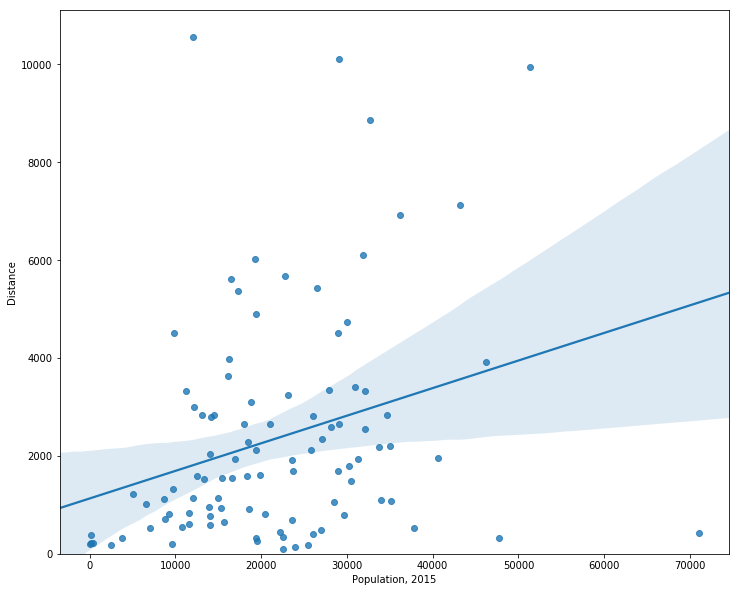

In [573]:
#plot of distance versus population
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="Population, 2015", y="Distance", data=subdf)
plt.ylim(0,)

In [574]:
l1=lm.score(X, Y)

In [575]:
X = subdf[['Total Income, 2015']]
Y = subdf['Distance']

In [576]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [577]:
lm.intercept_


2755.3498456223842

In [578]:
c2=lm.coef_

(0, 11081.56327058499)

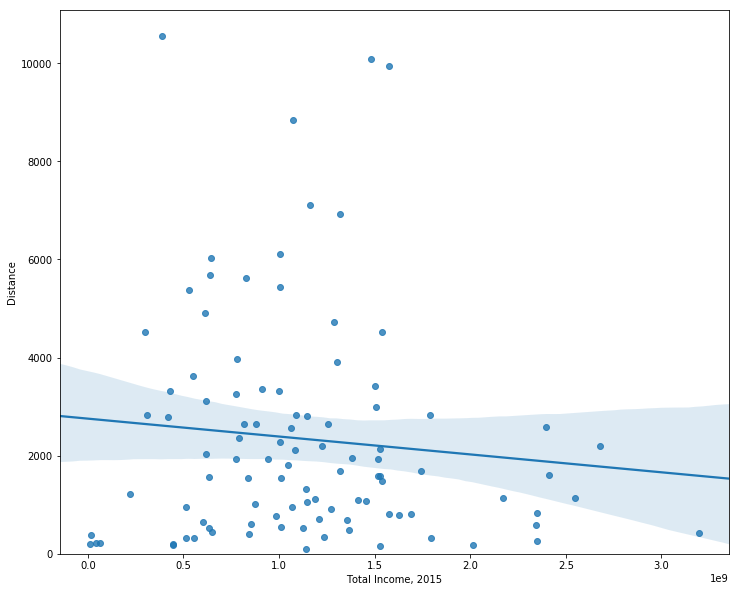

In [579]:
#plot of distance versus Income
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="Total Income, 2015", y="Distance", data=subdf)
plt.ylim(0,)

In [580]:
l2=lm.score(X, Y)

In [581]:
X = subdf[['Income Per Capita, 2015']]
Y = subdf['Distance']

In [582]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [583]:
lm.intercept_

3393.4174466790737

In [584]:
c3=lm.coef_

(0, 11362.871119419939)

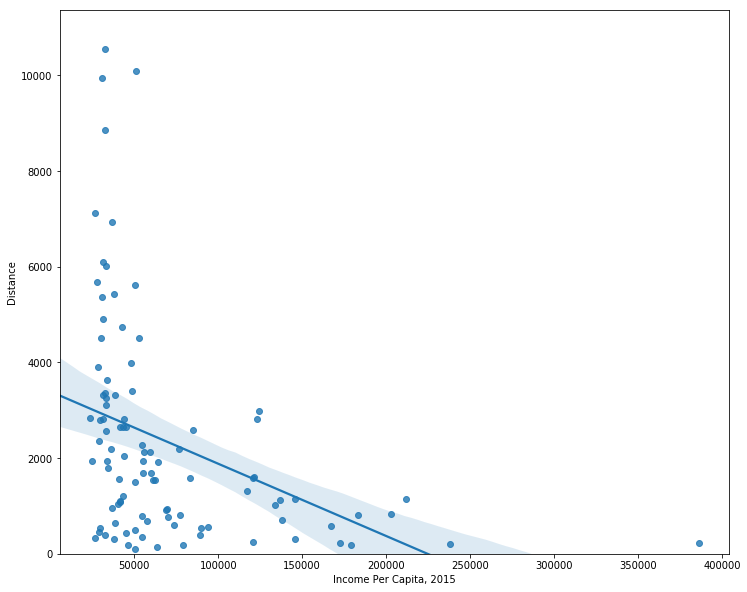

In [585]:
#plot of distance versus Income Per Capita
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="Income Per Capita, 2015", y="Distance", data=subdf)
plt.ylim(0,)

In [586]:
l3=lm.score(X, Y)

In [587]:
X = subdf[['Population, 2015', 'Total Income, 2015','Income Per Capita, 2015']]
Y = subdf['Distance']

In [588]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [589]:
lm.intercept_

2534.8944572518453

In [590]:
cm=lm.coef_

In [591]:
Y_hat = lm.predict(X)

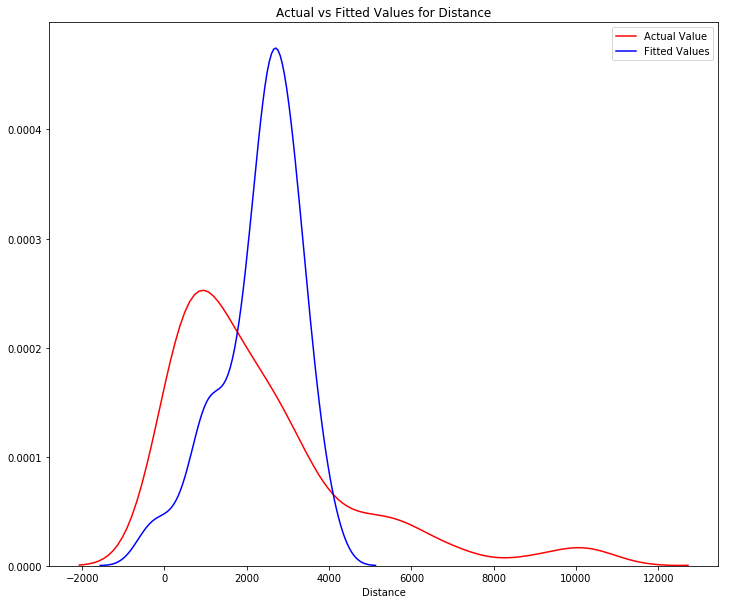

In [592]:
#plot of predicted values from Multiple Linear Regression versus actual values
plt.figure(figsize=(12, 10))


ax1 = sns.distplot(subdf['Distance'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Distance')
plt.xlabel('Distance')

plt.show()
plt.close()

In [593]:
ml=lm.score(X,Y)

In [649]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(0,70000, 500)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Distance')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Distance from Subway Station')
    plt.ylim(0,)

    plt.show()
    plt.close()

In [650]:
x = subdf['Population, 2015']
x=x.astype(float)
y = subdf['Distance']
y=y.astype(float)

In [651]:
import numpy as np
f = np.polyfit(x, y, 3)
p1 = np.poly1d(f)
print(p1)

            3            2
-3.194e-11 x + 1.62e-06 x + 0.05805 x + 770.1


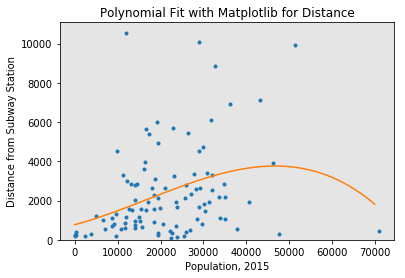

In [652]:
PlotPolly(p1, x, y, 'Population, 2015')

In [653]:
from sklearn.metrics import r2_score

In [654]:
r_squared1 = r2_score(y, p1(x))
r_squared1

0.11921267520633505

In [655]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(0, 3000000000, 30)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Distance')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Distance from Subway Station')
    plt.ylim(0,)

    plt.show()
    plt.close()

In [656]:
x = subdf['Total Income, 2015']
x=x.astype(float)
y = subdf['Distance']
y=y.astype(float)

In [657]:

f = np.polyfit(x, y, 3)
p2 = np.poly1d(f)
print(p2)

           3             2
5.294e-25 x - 2.999e-15 x + 4.189e-06 x + 1035


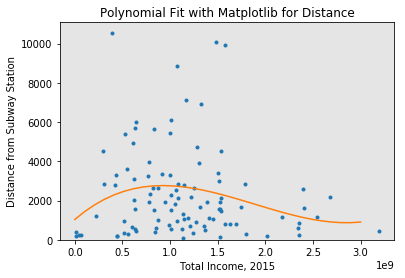

In [658]:
PlotPolly(p2, x, y, 'Total Income, 2015')

In [659]:
r_squared2 = r2_score(y, p2(x))
r_squared2

0.05224036501143303

In [660]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(0, 400000, 30)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Distance')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Distance from Subway Station')
    plt.ylim(0,)

    plt.show()
    plt.close()

In [661]:
x = subdf['Income Per Capita, 2015']
x=x.astype(float)
y = subdf['Distance']
y=y.astype(float)

In [662]:
f = np.polyfit(x, y, 3)
p3 = np.poly1d(f)
print(p3)

           3             2
-6.93e-13 x + 4.546e-07 x - 0.08715 x + 5779


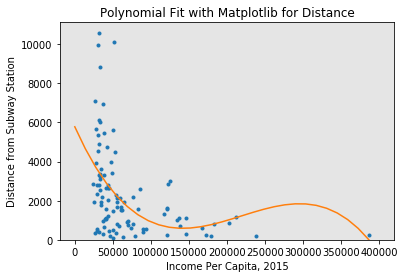

In [663]:
PlotPolly(p3, x, y, 'Income Per Capita, 2015')

In [664]:
r_squared3 = r2_score(y, p3(x))
r_squared3

0.21635969325592697

Income Per Capita seems to have the most predictive value explaining aout 21.6% of the data which is something but not very good.

In [665]:
resultdata={"Model":  ["Linear Regression - Population", 'Linear Regression - Total Income','Linear Regression - Income Per Capita', 'Multiple Linear Regression', "Polynomial Regression - Population", 'Polynomial Regression - Total Income','Polynomial Regression - Income Per Capita'],
            "Coefficient/ Model":[c1,c2,c3,cm,p1,p2,p3],
            "R-Squared":[l1,l2,l3,ml,r_squared1, r_squared2, r_squared3]
           }

In [669]:
results=pd.DataFrame(resultdata, columns=['Model', "Coefficient/ Model", "R-Squared"])

In [672]:
results.head(7)

,Model,Coefficient/ Model,R-Squared
0,Linear Regression - Population,[0.05634249662347578],0.086404
1,Linear Regression - Total Income,[-3.645665001787583e-07],0.009660
2,Linear Regression - Income Per Capita,[-0.015105284640252301],0.141342
3,Multiple Linear Regression,"[0.06001341224398632, -8.642061968470749e-07, ...",0.182263
4,Polynomial Regression - Population,"[-3.1943425625269684e-11, 1.6198088776474276e-...",0.119213
5,Polynomial Regression - Total Income,"[5.293839400327348e-25, -2.9987820912970153e-1...",0.052240
6,Polynomial Regression - Income Per Capita,"[-6.93019809542221e-13, 4.546413066151918e-07,...",0.216360
